In [3]:
import numpy as np
import pandas as pd

import xgboost
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

In [6]:
input_dir = 'C:/AkshayPersonal/projects/SantenderKaggleCustomer Project'
df_train = pd.read_csv(input_dir + '/train.csv')
df_train

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [7]:
var_colums = [c for c in df_train.columns if c not in ['ID_code','target']]
X = df_train.loc[:, var_colums]
y = df_train.loc[:, 'target']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((160000, 200), (40000, 200), (160000,), (40000,))

In [11]:
#creating the model

#seeing all the parameters
xgboost.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [12]:
model_xgboost = xgboost.XGBClassifier(learning_rate=0.1,
                                      max_depth=5,
                                      n_estimators=5000,
                                      subsample=0.5,
                                      colsample_bytree=0.5,
                                      eval_metric='auc',
                                      verbosity=1)

eval_set = [(X_valid, y_valid)]

model_xgboost.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)
# n_estimators  = 5000, which means maximum no of trees the model will create
# subsample = 0.5 which means that 50% of observations of training data set will randomly used to create the trees
# area under the curve is used as the metric
# verbosity = 1 , controls how much of the logs are gonna be printed


C:\Users\Night\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.59881
[1]	validation_0-auc:0.64803
[2]	validation_0-auc:0.68213
[3]	validation_0-auc:0.70171
[4]	validation_0-auc:0.71140
[5]	validation_0-auc:0.71531
[6]	validation_0-auc:0.71695
[7]	validation_0-auc:0.71938
[8]	validation_0-auc:0.72354
[9]	validation_0-auc:0.72510
[10]	validation_0-auc:0.72657
[11]	validation_0-auc:0.72867
[12]	validation_0-auc:0.73187
[13]	validation_0-auc:0.73363
[14]	validation_0-auc:0.73755
[15]	validation_0-auc:0.73919
[16]	validation_0-auc:0.74418
[17]	validation_0-auc:0.74519
[18]	validation_0-auc:0.74934
[19]	validation_0-auc:0.75342
[20]	validation_0-auc:0.75497
[21]	validation_0-auc:0.76006
[22]	validation_0-auc:0.76198
[23]	validation_0-auc:0.76281
[24]	validation_0-auc:0.76551
[25]	validation_0-auc:0.76724
[26]	validation_0-auc:0.76974
[27]	validation_0-auc:0.77426
[28]	validation_0-auc:0.77720
[29]	validation_0-auc:0.77932
[30]	validation_0-auc:0.78116
[31]	validation_0-auc:0.78309
[32]	validation_0-auc:0.78412
[33]	validation_0-au

[268]	validation_0-auc:0.87643
[269]	validation_0-auc:0.87655
[270]	validation_0-auc:0.87659
[271]	validation_0-auc:0.87665
[272]	validation_0-auc:0.87685
[273]	validation_0-auc:0.87694
[274]	validation_0-auc:0.87710
[275]	validation_0-auc:0.87713
[276]	validation_0-auc:0.87718
[277]	validation_0-auc:0.87723
[278]	validation_0-auc:0.87722
[279]	validation_0-auc:0.87724
[280]	validation_0-auc:0.87740
[281]	validation_0-auc:0.87756
[282]	validation_0-auc:0.87757
[283]	validation_0-auc:0.87763
[284]	validation_0-auc:0.87762
[285]	validation_0-auc:0.87759
[286]	validation_0-auc:0.87770
[287]	validation_0-auc:0.87780
[288]	validation_0-auc:0.87784
[289]	validation_0-auc:0.87793
[290]	validation_0-auc:0.87791
[291]	validation_0-auc:0.87798
[292]	validation_0-auc:0.87801
[293]	validation_0-auc:0.87801
[294]	validation_0-auc:0.87810
[295]	validation_0-auc:0.87820
[296]	validation_0-auc:0.87826
[297]	validation_0-auc:0.87827
[298]	validation_0-auc:0.87832
[299]	validation_0-auc:0.87834
[300]	va

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [13]:
y_train_pred = model_xgboost.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost.predict_proba(X_valid)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

#predict_proba gives the probality of getting a 0 and a 1 for the particular input value,
#and as we are working with if it will work , hence we are array indexing with 1



AUC Train: 0.9720
AUC Valid: 0.8840


4. Hyperparameter Tuning
We will use GridSearchCV for hyperparameter tuning.
As the first step, let us define all the possible hyperparameter values which we want to check.

Parameters which define the model architecture are referred to as hyperparameters and thus this process of searching for the ideal model architecture is referred to as hyperparameter tuning.

https://www.jeremyjordan.me/hyperparameter-tuning/

In [14]:
learning_rate_list = [0.02, 0.05, 0.1]
max_depth_list = [2, 3, 5]
n_estimators_list = [1000, 2000, 3000]

params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list}

num_combinations = 1
for v in params_dict.values(): num_combinations *= len(v) 

print(num_combinations)
params_dict

27


{'learning_rate': [0.02, 0.05, 0.1],
 'max_depth': [2, 3, 5],
 'n_estimators': [1000, 2000, 3000]}

In [15]:
def my_roc_auc_score(model, X, y): return roc_auc_score(y, model.predict_proba(X)[:,1])

model_xgboost_hp = GridSearchCV(estimator=xgboost.XGBClassifier(subsample=0.5,
                                                                colsample_bytree=0.25,
                                                                eval_metric='auc',
                                                                use_label_encoder=False),
                                param_grid=params_dict,
                                cv=2,
                                scoring=my_roc_auc_score,
                                return_train_score=True,
                                verbose=4)

model_xgboost_hp.fit(X, y)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=1000; total time= 4.0min
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=1000; total time= 3.9min
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=2000; total time= 7.4min
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=2000; total time= 7.3min
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=3000; total time=11.0min
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=3000; total time=10.5min
[CV 1/2] END learning_rate=0.02, max_depth=3, n_estimators=1000; total time= 3.3min
[CV 2/2] END learning_rate=0.02, max_depth=3, n_estimators=1000; total time= 3.2min
[CV 1/2] END learning_rate=0.02, max_depth=3, n_estimators=2000; total time=10.2min
[CV 2/2] END learning_rate=0.02, max_depth=3, n_estimators=2000; total time= 5.8min
[CV 1/2] END learning_rate=0.02, max_depth=3, n_estimators=3000; total time=14.9min
[CV 2/2] END le

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.25,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=None, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [16]:
df_cv_results = pd.DataFrame(model_xgboost_hp.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
11,1,0.896165,0.936795,0.05,2,3000
10,2,0.894507,0.928009,0.05,2,2000
13,3,0.894360,0.956679,0.05,3,2000
8,4,0.894238,0.991877,0.02,5,3000
5,5,0.894171,0.943489,0.02,3,3000
19,6,0.894058,0.942072,0.1,2,2000
14,7,0.893583,0.969907,0.05,3,3000
7,8,0.893254,0.982206,0.02,5,2000
18,9,0.892847,0.926002,0.1,2,1000
20,10,0.892005,0.953982,0.1,2,3000


Text(0.5, 1.0, 'Performance wrt # of Trees and Depth')

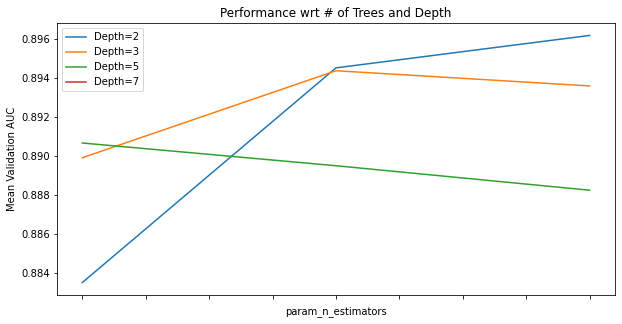

In [17]:
# First sort by number of estimators as that would be x-axis
df_cv_results.sort_values(by='param_n_estimators', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
lr_d2 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==2),:]
lr_d3 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==3),:]
lr_d5 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==5),:]
lr_d7 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==7),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
lr_d3.plot(x='param_n_estimators', y='mean_test_score', label='Depth=3', ax=ax)
lr_d5.plot(x='param_n_estimators', y='mean_test_score', label='Depth=5', ax=ax)
lr_d7.plot(x='param_n_estimators', y='mean_test_score', label='Depth=7', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of Trees and Depth')

Now that we have seen the performance is higher for higher values of trees and lower depth, let us find performance w.r.t. learning rate. We fix n_estimators to 3000 and depth to 2.

Text(0.5, 1.0, 'Performance wrt learning rate')

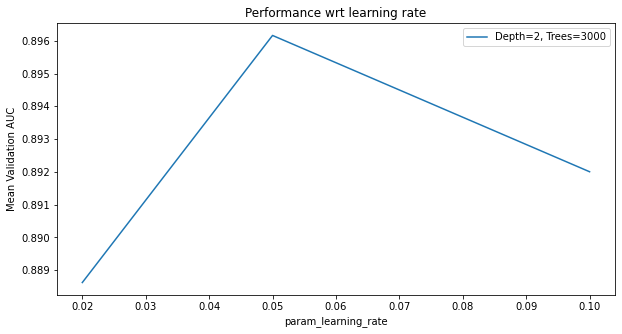

In [18]:
# First sort by learning rate as that would be x-axis
df_cv_results.sort_values(by='param_learning_rate', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
lr_t3k_d2 = df_cv_results.loc[(df_cv_results['param_n_estimators']==3000) & (df_cv_results['param_max_depth']==2),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_t3k_d2.plot(x='param_learning_rate', y='mean_test_score', label='Depth=2, Trees=3000', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt learning rate')

Final Model , with best hyper parameters from the above step

In [19]:
model_xgboost_fin = xgboost.XGBClassifier(learning_rate=0.05,
                                          max_depth=2,
                                          n_estimators=5000,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)

# Passing both training and validation dataset as we want to plot AUC for both
eval_set = [(X_train, y_train),(X_valid, y_valid)]

model_xgboost_fin.fit(X_train,
                  y_train,
                  early_stopping_rounds=20,
                  eval_set=eval_set,
                  verbose=True)

C:\Users\Night\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.54471	validation_1-auc:0.54322
[1]	validation_0-auc:0.58975	validation_1-auc:0.57818
[2]	validation_0-auc:0.61454	validation_1-auc:0.60187
[3]	validation_0-auc:0.65416	validation_1-auc:0.63476
[4]	validation_0-auc:0.67155	validation_1-auc:0.65197
[5]	validation_0-auc:0.66847	validation_1-auc:0.65050
[6]	validation_0-auc:0.67362	validation_1-auc:0.65386
[7]	validation_0-auc:0.68013	validation_1-auc:0.66303
[8]	validation_0-auc:0.69090	validation_1-auc:0.67322
[9]	validation_0-auc:0.69746	validation_1-auc:0.67789
[10]	validation_0-auc:0.70179	validation_1-auc:0.68453
[11]	validation_0-auc:0.70251	validation_1-auc:0.68606
[12]	validation_0-auc:0.70114	validation_1-auc:0.68422
[13]	validation_0-auc:0.71094	validation_1-auc:0.69233
[14]	validation_0-auc:0.71122	validation_1-auc:0.69394
[15]	validation_0-auc:0.71343	validation_1-auc:0.69597
[16]	validation_0-auc:0.71220	validation_1-auc:0.69451
[17]	validation_0-auc:0.71545	validation_1-auc:0.69697
[18]	validation_0-au

[149]	validation_0-auc:0.81491	validation_1-auc:0.79471
[150]	validation_0-auc:0.81562	validation_1-auc:0.79561
[151]	validation_0-auc:0.81616	validation_1-auc:0.79605
[152]	validation_0-auc:0.81610	validation_1-auc:0.79602
[153]	validation_0-auc:0.81595	validation_1-auc:0.79576
[154]	validation_0-auc:0.81651	validation_1-auc:0.79650
[155]	validation_0-auc:0.81719	validation_1-auc:0.79734
[156]	validation_0-auc:0.81791	validation_1-auc:0.79831
[157]	validation_0-auc:0.81858	validation_1-auc:0.79889
[158]	validation_0-auc:0.81950	validation_1-auc:0.79983
[159]	validation_0-auc:0.81977	validation_1-auc:0.80002
[160]	validation_0-auc:0.82008	validation_1-auc:0.80029
[161]	validation_0-auc:0.82055	validation_1-auc:0.80073
[162]	validation_0-auc:0.82049	validation_1-auc:0.80082
[163]	validation_0-auc:0.82068	validation_1-auc:0.80087
[164]	validation_0-auc:0.82138	validation_1-auc:0.80147
[165]	validation_0-auc:0.82163	validation_1-auc:0.80169
[166]	validation_0-auc:0.82207	validation_1-auc:

[296]	validation_0-auc:0.85503	validation_1-auc:0.83466
[297]	validation_0-auc:0.85501	validation_1-auc:0.83463
[298]	validation_0-auc:0.85520	validation_1-auc:0.83479
[299]	validation_0-auc:0.85540	validation_1-auc:0.83496
[300]	validation_0-auc:0.85551	validation_1-auc:0.83514
[301]	validation_0-auc:0.85545	validation_1-auc:0.83509
[302]	validation_0-auc:0.85561	validation_1-auc:0.83534
[303]	validation_0-auc:0.85582	validation_1-auc:0.83556
[304]	validation_0-auc:0.85604	validation_1-auc:0.83573
[305]	validation_0-auc:0.85603	validation_1-auc:0.83574
[306]	validation_0-auc:0.85620	validation_1-auc:0.83600
[307]	validation_0-auc:0.85654	validation_1-auc:0.83636
[308]	validation_0-auc:0.85680	validation_1-auc:0.83660
[309]	validation_0-auc:0.85694	validation_1-auc:0.83667
[310]	validation_0-auc:0.85714	validation_1-auc:0.83683
[311]	validation_0-auc:0.85709	validation_1-auc:0.83685
[312]	validation_0-auc:0.85741	validation_1-auc:0.83717
[313]	validation_0-auc:0.85765	validation_1-auc:

[443]	validation_0-auc:0.87432	validation_1-auc:0.85224
[444]	validation_0-auc:0.87435	validation_1-auc:0.85231
[445]	validation_0-auc:0.87445	validation_1-auc:0.85250
[446]	validation_0-auc:0.87457	validation_1-auc:0.85260
[447]	validation_0-auc:0.87465	validation_1-auc:0.85262
[448]	validation_0-auc:0.87471	validation_1-auc:0.85279
[449]	validation_0-auc:0.87480	validation_1-auc:0.85274
[450]	validation_0-auc:0.87489	validation_1-auc:0.85283
[451]	validation_0-auc:0.87494	validation_1-auc:0.85292
[452]	validation_0-auc:0.87505	validation_1-auc:0.85301
[453]	validation_0-auc:0.87508	validation_1-auc:0.85307
[454]	validation_0-auc:0.87521	validation_1-auc:0.85314
[455]	validation_0-auc:0.87538	validation_1-auc:0.85322
[456]	validation_0-auc:0.87553	validation_1-auc:0.85334
[457]	validation_0-auc:0.87560	validation_1-auc:0.85343
[458]	validation_0-auc:0.87573	validation_1-auc:0.85352
[459]	validation_0-auc:0.87587	validation_1-auc:0.85364
[460]	validation_0-auc:0.87593	validation_1-auc:

[590]	validation_0-auc:0.88484	validation_1-auc:0.86237
[591]	validation_0-auc:0.88487	validation_1-auc:0.86233
[592]	validation_0-auc:0.88491	validation_1-auc:0.86230
[593]	validation_0-auc:0.88497	validation_1-auc:0.86231
[594]	validation_0-auc:0.88503	validation_1-auc:0.86238
[595]	validation_0-auc:0.88514	validation_1-auc:0.86256
[596]	validation_0-auc:0.88528	validation_1-auc:0.86266
[597]	validation_0-auc:0.88530	validation_1-auc:0.86270
[598]	validation_0-auc:0.88538	validation_1-auc:0.86280
[599]	validation_0-auc:0.88541	validation_1-auc:0.86281
[600]	validation_0-auc:0.88551	validation_1-auc:0.86295
[601]	validation_0-auc:0.88557	validation_1-auc:0.86296
[602]	validation_0-auc:0.88558	validation_1-auc:0.86292
[603]	validation_0-auc:0.88570	validation_1-auc:0.86306
[604]	validation_0-auc:0.88578	validation_1-auc:0.86314
[605]	validation_0-auc:0.88589	validation_1-auc:0.86326
[606]	validation_0-auc:0.88600	validation_1-auc:0.86339
[607]	validation_0-auc:0.88608	validation_1-auc:

[737]	validation_0-auc:0.89343	validation_1-auc:0.87017
[738]	validation_0-auc:0.89347	validation_1-auc:0.87021
[739]	validation_0-auc:0.89347	validation_1-auc:0.87022
[740]	validation_0-auc:0.89354	validation_1-auc:0.87032
[741]	validation_0-auc:0.89357	validation_1-auc:0.87040
[742]	validation_0-auc:0.89365	validation_1-auc:0.87047
[743]	validation_0-auc:0.89368	validation_1-auc:0.87047
[744]	validation_0-auc:0.89374	validation_1-auc:0.87054
[745]	validation_0-auc:0.89377	validation_1-auc:0.87056
[746]	validation_0-auc:0.89377	validation_1-auc:0.87055
[747]	validation_0-auc:0.89385	validation_1-auc:0.87065
[748]	validation_0-auc:0.89388	validation_1-auc:0.87070
[749]	validation_0-auc:0.89397	validation_1-auc:0.87078
[750]	validation_0-auc:0.89401	validation_1-auc:0.87083
[751]	validation_0-auc:0.89408	validation_1-auc:0.87088
[752]	validation_0-auc:0.89412	validation_1-auc:0.87092
[753]	validation_0-auc:0.89417	validation_1-auc:0.87100
[754]	validation_0-auc:0.89420	validation_1-auc:

[884]	validation_0-auc:0.89935	validation_1-auc:0.87585
[885]	validation_0-auc:0.89938	validation_1-auc:0.87588
[886]	validation_0-auc:0.89941	validation_1-auc:0.87593
[887]	validation_0-auc:0.89946	validation_1-auc:0.87597
[888]	validation_0-auc:0.89951	validation_1-auc:0.87600
[889]	validation_0-auc:0.89954	validation_1-auc:0.87603
[890]	validation_0-auc:0.89959	validation_1-auc:0.87608
[891]	validation_0-auc:0.89965	validation_1-auc:0.87612
[892]	validation_0-auc:0.89969	validation_1-auc:0.87616
[893]	validation_0-auc:0.89973	validation_1-auc:0.87620
[894]	validation_0-auc:0.89976	validation_1-auc:0.87620
[895]	validation_0-auc:0.89976	validation_1-auc:0.87620
[896]	validation_0-auc:0.89976	validation_1-auc:0.87621
[897]	validation_0-auc:0.89981	validation_1-auc:0.87625
[898]	validation_0-auc:0.89980	validation_1-auc:0.87624
[899]	validation_0-auc:0.89985	validation_1-auc:0.87630
[900]	validation_0-auc:0.89987	validation_1-auc:0.87628
[901]	validation_0-auc:0.89990	validation_1-auc:

[1030]	validation_0-auc:0.90408	validation_1-auc:0.88006
[1031]	validation_0-auc:0.90410	validation_1-auc:0.88011
[1032]	validation_0-auc:0.90416	validation_1-auc:0.88020
[1033]	validation_0-auc:0.90419	validation_1-auc:0.88024
[1034]	validation_0-auc:0.90422	validation_1-auc:0.88026
[1035]	validation_0-auc:0.90425	validation_1-auc:0.88031
[1036]	validation_0-auc:0.90429	validation_1-auc:0.88034
[1037]	validation_0-auc:0.90432	validation_1-auc:0.88035
[1038]	validation_0-auc:0.90436	validation_1-auc:0.88041
[1039]	validation_0-auc:0.90441	validation_1-auc:0.88043
[1040]	validation_0-auc:0.90444	validation_1-auc:0.88046
[1041]	validation_0-auc:0.90447	validation_1-auc:0.88051
[1042]	validation_0-auc:0.90450	validation_1-auc:0.88054
[1043]	validation_0-auc:0.90454	validation_1-auc:0.88060
[1044]	validation_0-auc:0.90456	validation_1-auc:0.88062
[1045]	validation_0-auc:0.90459	validation_1-auc:0.88064
[1046]	validation_0-auc:0.90464	validation_1-auc:0.88067
[1047]	validation_0-auc:0.90469

[1174]	validation_0-auc:0.90756	validation_1-auc:0.88357
[1175]	validation_0-auc:0.90758	validation_1-auc:0.88358
[1176]	validation_0-auc:0.90759	validation_1-auc:0.88360
[1177]	validation_0-auc:0.90763	validation_1-auc:0.88360
[1178]	validation_0-auc:0.90762	validation_1-auc:0.88360
[1179]	validation_0-auc:0.90764	validation_1-auc:0.88360
[1180]	validation_0-auc:0.90767	validation_1-auc:0.88363
[1181]	validation_0-auc:0.90774	validation_1-auc:0.88368
[1182]	validation_0-auc:0.90778	validation_1-auc:0.88373
[1183]	validation_0-auc:0.90780	validation_1-auc:0.88374
[1184]	validation_0-auc:0.90783	validation_1-auc:0.88377
[1185]	validation_0-auc:0.90786	validation_1-auc:0.88380
[1186]	validation_0-auc:0.90788	validation_1-auc:0.88380
[1187]	validation_0-auc:0.90791	validation_1-auc:0.88384
[1188]	validation_0-auc:0.90792	validation_1-auc:0.88385
[1189]	validation_0-auc:0.90793	validation_1-auc:0.88388
[1190]	validation_0-auc:0.90795	validation_1-auc:0.88391
[1191]	validation_0-auc:0.90799

[1318]	validation_0-auc:0.91040	validation_1-auc:0.88583
[1319]	validation_0-auc:0.91042	validation_1-auc:0.88585
[1320]	validation_0-auc:0.91045	validation_1-auc:0.88586
[1321]	validation_0-auc:0.91046	validation_1-auc:0.88586
[1322]	validation_0-auc:0.91049	validation_1-auc:0.88590
[1323]	validation_0-auc:0.91049	validation_1-auc:0.88589
[1324]	validation_0-auc:0.91051	validation_1-auc:0.88591
[1325]	validation_0-auc:0.91053	validation_1-auc:0.88590
[1326]	validation_0-auc:0.91055	validation_1-auc:0.88592
[1327]	validation_0-auc:0.91056	validation_1-auc:0.88595
[1328]	validation_0-auc:0.91057	validation_1-auc:0.88593
[1329]	validation_0-auc:0.91058	validation_1-auc:0.88597
[1330]	validation_0-auc:0.91062	validation_1-auc:0.88599
[1331]	validation_0-auc:0.91065	validation_1-auc:0.88600
[1332]	validation_0-auc:0.91065	validation_1-auc:0.88602
[1333]	validation_0-auc:0.91067	validation_1-auc:0.88603
[1334]	validation_0-auc:0.91069	validation_1-auc:0.88605
[1335]	validation_0-auc:0.91072

[1462]	validation_0-auc:0.91309	validation_1-auc:0.88781
[1463]	validation_0-auc:0.91310	validation_1-auc:0.88781
[1464]	validation_0-auc:0.91312	validation_1-auc:0.88784
[1465]	validation_0-auc:0.91312	validation_1-auc:0.88782
[1466]	validation_0-auc:0.91313	validation_1-auc:0.88787
[1467]	validation_0-auc:0.91316	validation_1-auc:0.88790
[1468]	validation_0-auc:0.91317	validation_1-auc:0.88791
[1469]	validation_0-auc:0.91319	validation_1-auc:0.88794
[1470]	validation_0-auc:0.91321	validation_1-auc:0.88796
[1471]	validation_0-auc:0.91322	validation_1-auc:0.88797
[1472]	validation_0-auc:0.91324	validation_1-auc:0.88798
[1473]	validation_0-auc:0.91326	validation_1-auc:0.88799
[1474]	validation_0-auc:0.91328	validation_1-auc:0.88801
[1475]	validation_0-auc:0.91328	validation_1-auc:0.88800
[1476]	validation_0-auc:0.91331	validation_1-auc:0.88801
[1477]	validation_0-auc:0.91333	validation_1-auc:0.88803
[1478]	validation_0-auc:0.91337	validation_1-auc:0.88807
[1479]	validation_0-auc:0.91342

[1606]	validation_0-auc:0.91526	validation_1-auc:0.88933
[1607]	validation_0-auc:0.91528	validation_1-auc:0.88933
[1608]	validation_0-auc:0.91529	validation_1-auc:0.88934
[1609]	validation_0-auc:0.91531	validation_1-auc:0.88934
[1610]	validation_0-auc:0.91533	validation_1-auc:0.88933
[1611]	validation_0-auc:0.91531	validation_1-auc:0.88932
[1612]	validation_0-auc:0.91533	validation_1-auc:0.88935
[1613]	validation_0-auc:0.91535	validation_1-auc:0.88937
[1614]	validation_0-auc:0.91537	validation_1-auc:0.88940
[1615]	validation_0-auc:0.91539	validation_1-auc:0.88941
[1616]	validation_0-auc:0.91539	validation_1-auc:0.88941
[1617]	validation_0-auc:0.91540	validation_1-auc:0.88940
[1618]	validation_0-auc:0.91542	validation_1-auc:0.88942
[1619]	validation_0-auc:0.91542	validation_1-auc:0.88943
[1620]	validation_0-auc:0.91542	validation_1-auc:0.88945
[1621]	validation_0-auc:0.91544	validation_1-auc:0.88947
[1622]	validation_0-auc:0.91546	validation_1-auc:0.88948
[1623]	validation_0-auc:0.91547

[1750]	validation_0-auc:0.91697	validation_1-auc:0.89082
[1751]	validation_0-auc:0.91698	validation_1-auc:0.89082
[1752]	validation_0-auc:0.91699	validation_1-auc:0.89084
[1753]	validation_0-auc:0.91702	validation_1-auc:0.89083
[1754]	validation_0-auc:0.91703	validation_1-auc:0.89084
[1755]	validation_0-auc:0.91705	validation_1-auc:0.89085
[1756]	validation_0-auc:0.91707	validation_1-auc:0.89085
[1757]	validation_0-auc:0.91708	validation_1-auc:0.89084
[1758]	validation_0-auc:0.91710	validation_1-auc:0.89085
[1759]	validation_0-auc:0.91709	validation_1-auc:0.89088
[1760]	validation_0-auc:0.91710	validation_1-auc:0.89089
[1761]	validation_0-auc:0.91711	validation_1-auc:0.89091
[1762]	validation_0-auc:0.91712	validation_1-auc:0.89091
[1763]	validation_0-auc:0.91713	validation_1-auc:0.89092
[1764]	validation_0-auc:0.91714	validation_1-auc:0.89094
[1765]	validation_0-auc:0.91714	validation_1-auc:0.89094
[1766]	validation_0-auc:0.91714	validation_1-auc:0.89092
[1767]	validation_0-auc:0.91715

[1894]	validation_0-auc:0.91857	validation_1-auc:0.89187
[1895]	validation_0-auc:0.91859	validation_1-auc:0.89187
[1896]	validation_0-auc:0.91860	validation_1-auc:0.89188
[1897]	validation_0-auc:0.91861	validation_1-auc:0.89188
[1898]	validation_0-auc:0.91861	validation_1-auc:0.89188
[1899]	validation_0-auc:0.91863	validation_1-auc:0.89188
[1900]	validation_0-auc:0.91863	validation_1-auc:0.89187
[1901]	validation_0-auc:0.91864	validation_1-auc:0.89189
[1902]	validation_0-auc:0.91865	validation_1-auc:0.89191
[1903]	validation_0-auc:0.91867	validation_1-auc:0.89192
[1904]	validation_0-auc:0.91868	validation_1-auc:0.89193
[1905]	validation_0-auc:0.91869	validation_1-auc:0.89193
[1906]	validation_0-auc:0.91870	validation_1-auc:0.89192
[1907]	validation_0-auc:0.91872	validation_1-auc:0.89194
[1908]	validation_0-auc:0.91873	validation_1-auc:0.89196
[1909]	validation_0-auc:0.91874	validation_1-auc:0.89197
[1910]	validation_0-auc:0.91875	validation_1-auc:0.89196
[1911]	validation_0-auc:0.91877

[2038]	validation_0-auc:0.91994	validation_1-auc:0.89267
[2039]	validation_0-auc:0.91996	validation_1-auc:0.89267
[2040]	validation_0-auc:0.91996	validation_1-auc:0.89268
[2041]	validation_0-auc:0.91997	validation_1-auc:0.89267
[2042]	validation_0-auc:0.91998	validation_1-auc:0.89268
[2043]	validation_0-auc:0.92000	validation_1-auc:0.89268
[2044]	validation_0-auc:0.92002	validation_1-auc:0.89268
[2045]	validation_0-auc:0.92002	validation_1-auc:0.89268
[2046]	validation_0-auc:0.92004	validation_1-auc:0.89270
[2047]	validation_0-auc:0.92003	validation_1-auc:0.89269
[2048]	validation_0-auc:0.92004	validation_1-auc:0.89272
[2049]	validation_0-auc:0.92005	validation_1-auc:0.89271
[2050]	validation_0-auc:0.92007	validation_1-auc:0.89273
[2051]	validation_0-auc:0.92008	validation_1-auc:0.89274
[2052]	validation_0-auc:0.92008	validation_1-auc:0.89274
[2053]	validation_0-auc:0.92009	validation_1-auc:0.89277
[2054]	validation_0-auc:0.92010	validation_1-auc:0.89276
[2055]	validation_0-auc:0.92010

[2182]	validation_0-auc:0.92113	validation_1-auc:0.89333
[2183]	validation_0-auc:0.92113	validation_1-auc:0.89334
[2184]	validation_0-auc:0.92114	validation_1-auc:0.89335
[2185]	validation_0-auc:0.92116	validation_1-auc:0.89337
[2186]	validation_0-auc:0.92116	validation_1-auc:0.89336
[2187]	validation_0-auc:0.92117	validation_1-auc:0.89338
[2188]	validation_0-auc:0.92119	validation_1-auc:0.89339
[2189]	validation_0-auc:0.92119	validation_1-auc:0.89339
[2190]	validation_0-auc:0.92120	validation_1-auc:0.89340
[2191]	validation_0-auc:0.92122	validation_1-auc:0.89341
[2192]	validation_0-auc:0.92121	validation_1-auc:0.89341
[2193]	validation_0-auc:0.92123	validation_1-auc:0.89344
[2194]	validation_0-auc:0.92124	validation_1-auc:0.89343
[2195]	validation_0-auc:0.92125	validation_1-auc:0.89347
[2196]	validation_0-auc:0.92125	validation_1-auc:0.89346
[2197]	validation_0-auc:0.92127	validation_1-auc:0.89346
[2198]	validation_0-auc:0.92127	validation_1-auc:0.89349
[2199]	validation_0-auc:0.92128

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.25,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Let us find out the performance of the final model by calculating AUC value on training and validation sets

In [20]:
y_train_pred = model_xgboost_fin.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost_fin.predict_proba(X_valid)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

AUC Train: 0.9219
AUC Valid: 0.8938


Let us print model performance w.r.t number of trees. The first step is to get AUC values on training and validation dataset for every value of the tree. We can use eval_result() function to get that. Then we can go ahead and plot it.

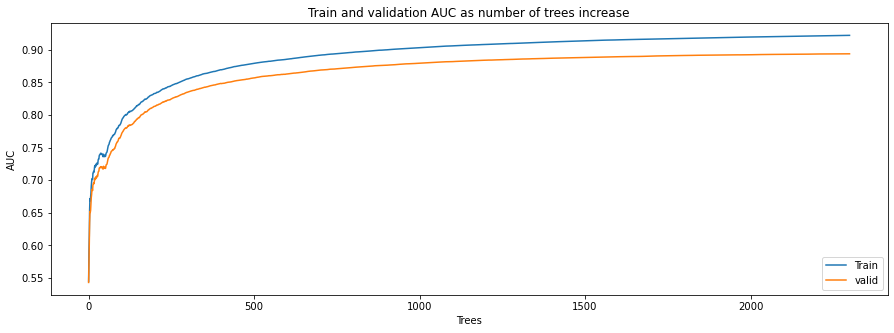

In [21]:
evaluation_results = model_xgboost_fin.evals_result()

# Index into each key to find AUC values for training and validation data after each tree
train_auc_tree = evaluation_results['validation_0']['auc']
valid_auc_tree = evaluation_results['validation_1']['auc']


# Plotting Section
plt.figure(figsize=(15,5))

plt.plot(train_auc_tree, label='Train')
plt.plot(valid_auc_tree, label='valid')

plt.title("Train and validation AUC as number of trees increase")
plt.xlabel("Trees")
plt.ylabel("AUC")
plt.legend(loc='lower right')
plt.show()

In [22]:
df_var_imp = pd.DataFrame({"Variable": var_colums,
                           "Importance": model_xgboost_fin.feature_importances_}) \
                        .sort_values(by='Importance', ascending=False)
df_var_imp[:10]

#variable importance = gives importance of all independent variables in the model 


,Variable,Importance
81,var_81,0.016582
139,var_139,0.015478
110,var_110,0.014098
26,var_26,0.013052
12,var_12,0.012555
53,var_53,0.011409
146,var_146,0.010754
22,var_22,0.010673
6,var_6,0.010669
76,var_76,0.010302


Score the test data 

In [25]:
df_test = pd.read_csv(input_dir + '/test.csv')
df_sample_submissions = pd.read_csv(input_dir + '/sample_submission.csv')
df_test.shape, df_sample_submissions.shape

((200000, 201), (200000, 2))

In [26]:
X_test = df_test.loc[:, var_colums]

df_sample_submissions['target'] = model_xgboost_fin.predict_proba(X_test)[:,1]
df_sample_submissions

,ID_code,target
0,test_0,0.068242
1,test_1,0.178003
2,test_2,0.221668
3,test_3,0.203406
4,test_4,0.051353
...,...,...
199995,test_199995,0.036816
199996,test_199996,0.009005
199997,test_199997,0.004208
199998,test_199998,0.099931


In [27]:
output_dir = 'C:/AkshayPersonal/projects/SantenderKaggleCustomer Project'
df_sample_submissions.to_csv(output_dir + "05_xgboost_scores.csv", index=False)